In [1]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
file_path = r""
df = pd.read_csv(file_path)

Sentiment Analysis with VADER

For 2 Categories : Positive and Negative

In [20]:
# Sentiment Analysis using VADER
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Shagufta\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
sa = SentimentIntensityAnalyzer()
df['sentiment'] = df['Review'].apply(lambda x: 'positive' if sa.polarity_scores(str(x))['compound'] > 0 else 'negative')

In [22]:
# Save the results
df.to_csv('Result_Customer_Review.csv', index=False)
print("Sentiment analysis completed. Results saved.")

Sentiment analysis completed. Results saved.


For 5 categories: Negative, Mixed Negative, Neutral, Mixed Positive, Positive

In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
def get_polarity_scores(text):
    return sia.polarity_scores(str(text))['compound']

df['polarity_score'] = df['Review'].apply(get_polarity_scores)

In [25]:
df.sample(5)

,Review,CustomerID,Sale Department,sentiment,polarity_score
43,The product stopped working after a few days. ...,44,Decor,negative,-0.6249
12,Very happy with the quality of the product. Hi...,13,Kitchen,positive,0.7951
17,"The product is okay, but it doesn't justify th...",18,Office,positive,0.1154
48,"Customer service was helpful, but the product ...",49,Decor,positive,0.2263
2,"Great service, fast shipping, and the product ...",3,Office,positive,0.6249


In [26]:
print("Max Score", df['polarity_score'].max())
print("Min Score", df['polarity_score'].min())

Max Score 0.9115
Min Score -0.7644


In [27]:
#Generate 5 evenly spaced numbers/bins
import numpy as np
min_score = df['polarity_score'].min()
max_score = df['polarity_score'].max()
bins = np.linspace(min_score, max_score, 6)
bins

array([-0.7644 , -0.42922, -0.09404,  0.24114,  0.57632,  0.9115 ])

In [28]:
def cat_senti(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.6:
        return 'Positive'
    elif 0.2<= score <= 0.6:
        return 'Mixed Positive'
    elif -0.2<= score <= 0.2:
        return 'Neutral'
    elif -0.2<= score <= 0.6:
        return 'Mixed Negative'
    else:
        return 'Negative'

df['Sentiment'] = df['Review'].apply(cat_senti)

In [29]:
df.sample(5)

,Review,CustomerID,Sale Department,sentiment,polarity_score,Sentiment
21,I am not happy with the purchase. Poor quality.,22,Fitness,negative,-0.7268,Negative
34,The customer service was unresponsive when I h...,35,Fitness,negative,0.0000,Neutral
28,"The product arrived damaged, but the company r...",29,Kitchen,negative,-0.2382,Negative
31,I'm very impressed with the quality of the pro...,32,Kitchen,positive,0.5256,Mixed Positive
8,Excellent product! Exceeded my expectations.,9,Fitness,positive,0.6114,Positive


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
sent2 = df.groupby(['sentiment']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
sent2

,sentiment,Count
1,positive,32
0,negative,18


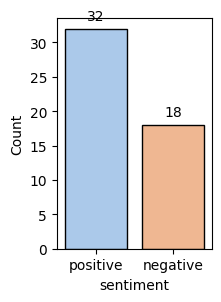

In [63]:
plt.figure(figsize=(2,3))
ax = sns.barplot(data = sent2, x='sentiment', y='Count', palette='pastel', edgecolor ='black')
for bars in ax.containers:
    ax.bar_label(bars, padding= 4);

In [60]:
sent5 = df.groupby(['Sentiment']).size().reset_index(name='Count').sort_values(by='Count',ascending=False)
sent5

,Sentiment,Count
3,Positive,17
1,Negative,15
0,Mixed Positive,12
2,Neutral,6


In [35]:
import warnings
warnings.filterwarnings("ignore")

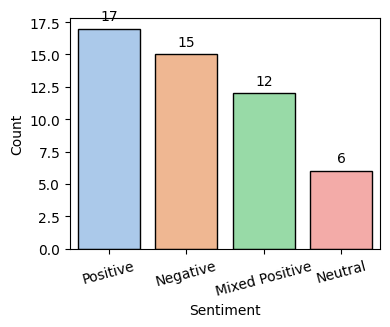

In [66]:
plt.figure(figsize=(4,3))
ax = sns.barplot(data = sent5, x='Sentiment', y='Count', palette='pastel', edgecolor ='black')
for bars in ax.containers:
    ax.bar_label(bars, padding= 4)

plt.xticks(rotation=(15));